In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
# Drop Unwanted Columns

df = df.drop(columns=["RowNumber", "CustomerId",	"Surname"],axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Customer Churn Distribution**

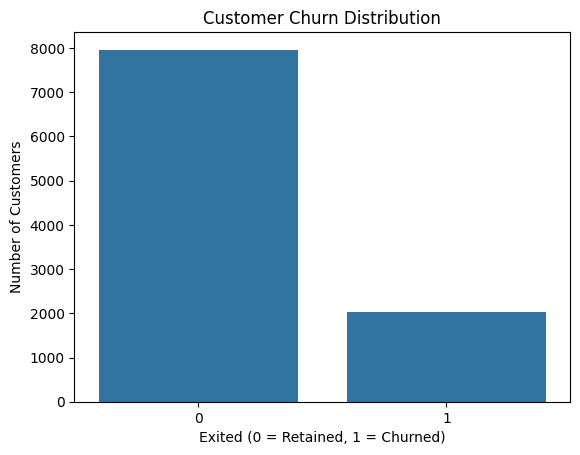

In [3]:
# Graph: Count Plot

sns.countplot(x='Exited', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.show()

Insight:
- Most customers are retained, but a significant portion has churned
- This imbalance should be considered before building ML models

# **Gender Distribution**

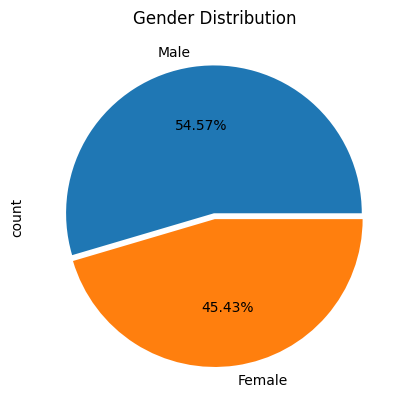

In [9]:
df["Gender"].value_counts().plot(kind = "pie",
                                 autopct = "%0.2f%%",
                                 explode = [0.02,0.02],
                                 title = "Gender Distribution");

Insights :

- The customer base is slightly male-dominated, with males accounting for 54.57% and females 45.43%, indicating a relatively balanced gender distribution overall.

- The near-even gender split suggests churn or engagement strategies should target both genders, rather than focusing on a single dominant group, as both represent significant portions of the customer base.

# **Churn by Geography**

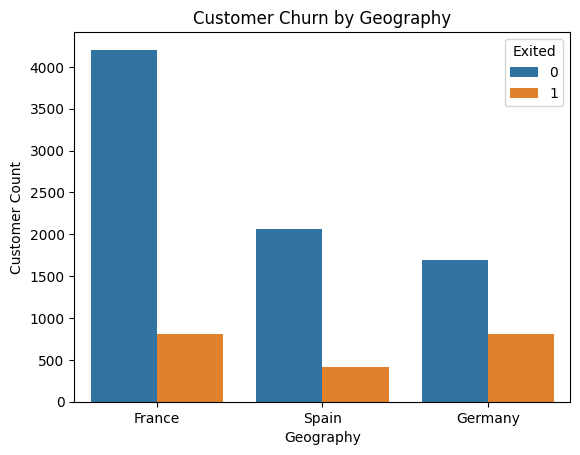

In [4]:
# Graph: Count Plot with Hue

sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Customer Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Customer Count")
plt.show()

Insight:
- Certain regions show higher churn rates
- Helps identify region-specific business risks
- Useful for targeted retention strategies

# **Age vs Churn**

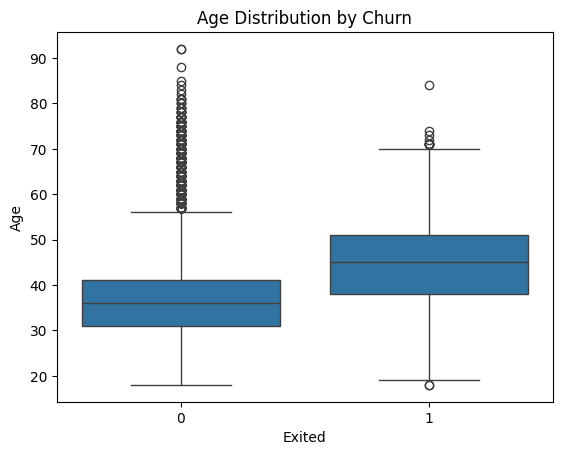

In [5]:
# Graph: Box Plot

sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age Distribution by Churn")
plt.xlabel("Exited")
plt.ylabel("Age")
plt.show()

Insight:
- Customers who churn are generally older
- Age is a strong demographic indicator of churn behavior

# **Credit Score vs Churn**

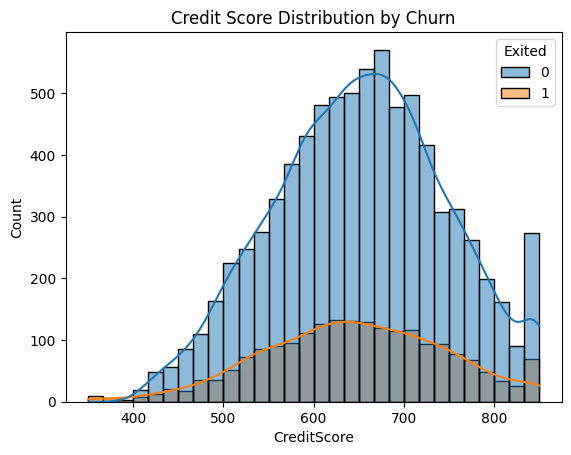

In [6]:
# Graph: Histogram
sns.histplot(data=df, x='CreditScore', hue='Exited', bins=30, kde=True)
plt.title("Credit Score Distribution by Churn")
plt.show()

Insight:
- Customers with lower credit scores tend to churn more
- Credit score can be a valuable feature for churn prediction models

# **Number of Products vs Churn**

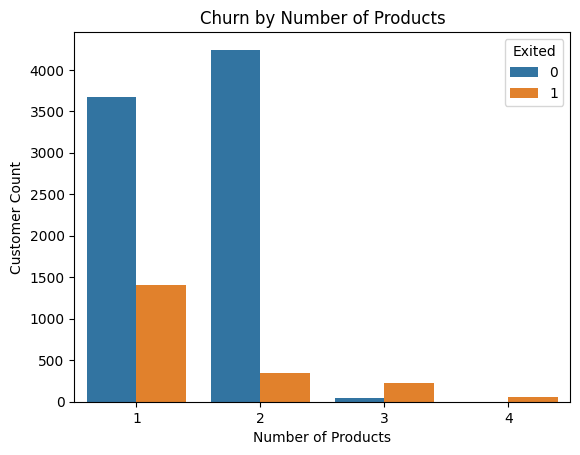

In [7]:
# Graph: Bar Plot
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Churn by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Customer Count")
plt.show()

Insight:
- Customers with only one product have the highest churn
- Cross-selling more products can significantly reduce churn

# **Activity Status vs Churn**

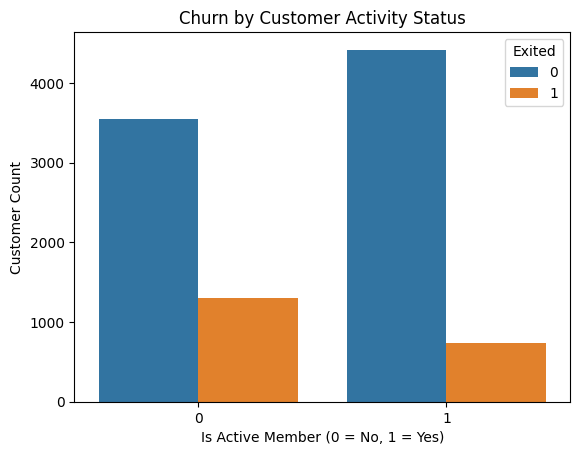

In [8]:
# Graph: Count Plot
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Churn by Customer Activity Status")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

Insight:
- Inactive members churn far more than active ones
- Activity level is one of the strongest churn predictors
- Engagement campaigns can drastically reduce churn